<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          250 non-null    object 
 1   OrderDate        250 non-null    object 
 2   CustomerID       250 non-null    object 
 3   Region           250 non-null    object 
 4   CustomerSegment  250 non-null    object 
 5   Product          250 non-null    object 
 6   Category         250 non-null    object 
 7   Quantity         250 non-null    int64  
 8   UnitPrice        250 non-null    float64
 9   Sales            250 non-null    float64
 10  CostPerUnit      250 non-null    float64
 11  Profit           250 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 23.6+ KB


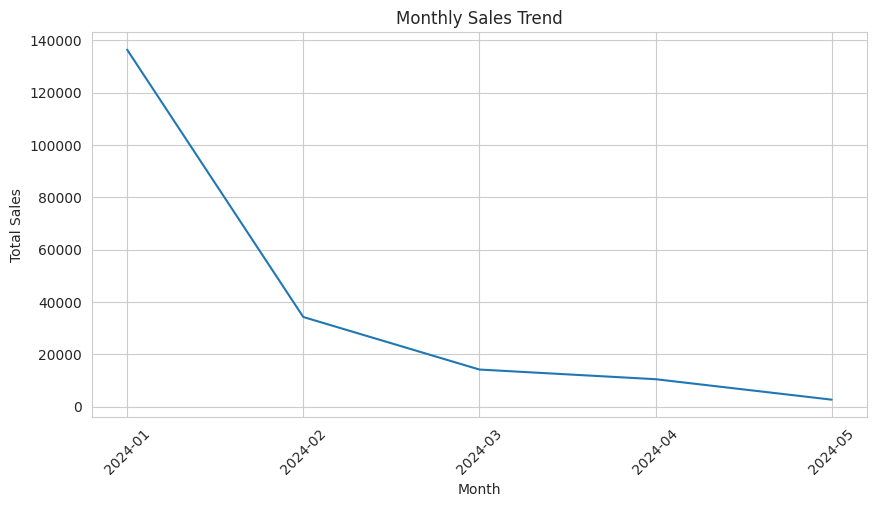

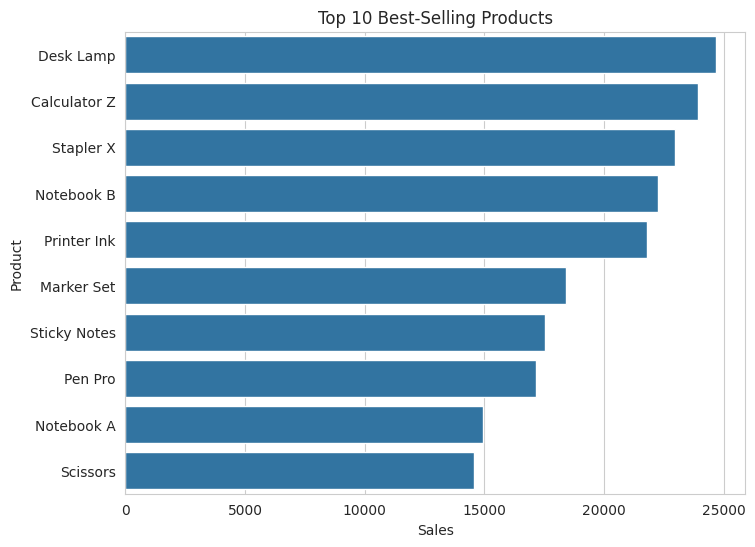

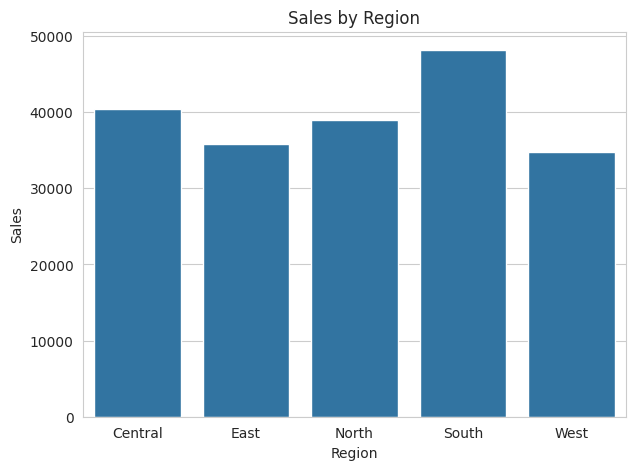

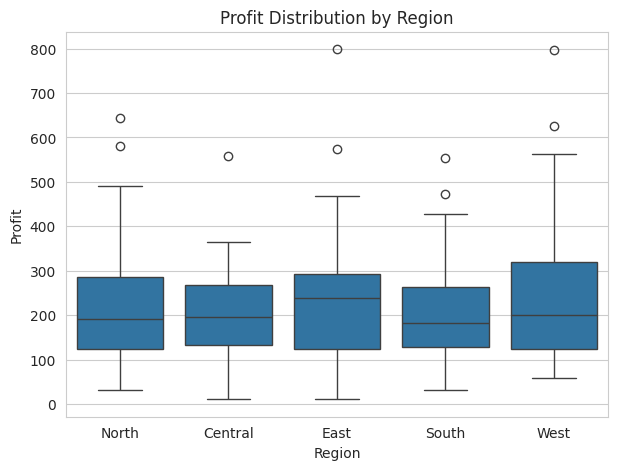

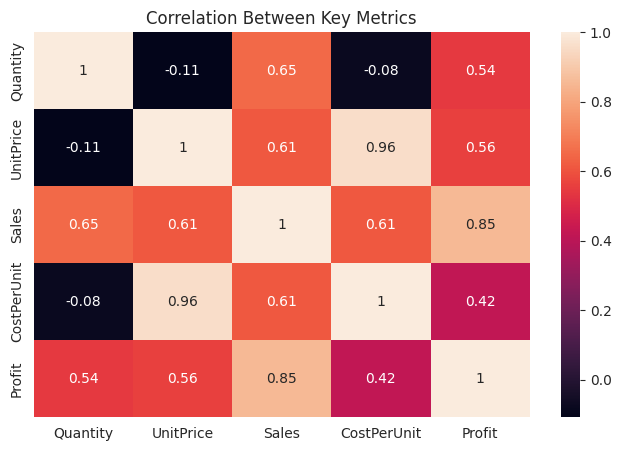

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
df = pd.read_csv("sales_dataset.csv")
df.head()
df.info()
df.describe()
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Month'] = df['OrderDate'].dt.to_period('M')
df['Year'] = df['OrderDate'].dt.year
df['SalesPerUnit'] = df['Sales'] / df['Quantity']
df.head()
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()
top_products = df.groupby('Product')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=top_products, x="Sales", y="Product")
plt.title("Top 10 Best-Selling Products")
plt.show()
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=region_sales, x="Region", y="Sales")
plt.title("Sales by Region")
plt.show()
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Region", y="Profit")
plt.title("Profit Distribution by Region")
plt.show()
plt.figure(figsize=(8,5))
sns.heatmap(df[['Quantity','UnitPrice','Sales','CostPerUnit','Profit']].corr(), annot=True)
plt.title("Correlation Between Key Metrics")
plt.show()

